In [13]:
!pip install fastf1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:

import fastf1
from matplotlib import pyplot as plt
from fastf1 import plotting





In [15]:
from google.colab import drive
drive.mount('/content/drive/')

%cd '/content/drive/MyDrive/Colab Notebooks/'

fastf1.Cache.enable_cache('Cache')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


In [16]:
year= 2023
gp = 'Saudi Arabia'
event = 'R'
session_race = fastf1.get_session(year, gp, event)
session_race.load()

session_race.laps

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:04:28.186000,11,NaT,1,0 days 00:23:44.378000,NaT,NaT,0 days 00:00:29.964000,0 days 00:00:30.233000,NaT,...,MEDIUM,1.0,True,1,0 days 01:02:50.632000,Red Bull Racing,PER,1,False,2023-03-19 17:03:50.718
1,0 days 01:06:04.092000,11,0 days 00:01:35.906000,2,NaT,NaT,0 days 00:00:35.785000,0 days 00:00:29.903000,0 days 00:00:30.218000,0 days 01:05:03.971000,...,MEDIUM,2.0,True,1,0 days 01:04:28.186000,Red Bull Racing,PER,1,True,2023-03-19 17:05:28.272
2,0 days 01:07:38.921000,11,0 days 00:01:34.829000,3,NaT,NaT,0 days 00:00:35.340000,0 days 00:00:29.825000,0 days 00:00:29.664000,0 days 01:06:39.432000,...,MEDIUM,3.0,True,1,0 days 01:06:04.092000,Red Bull Racing,PER,1,True,2023-03-19 17:07:04.178
3,0 days 01:09:14.572000,11,0 days 00:01:35.651000,4,NaT,NaT,0 days 00:00:35.484000,0 days 00:00:30.147000,0 days 00:00:30.020000,0 days 01:08:14.405000,...,MEDIUM,4.0,True,1,0 days 01:07:38.921000,Red Bull Racing,PER,1,True,2023-03-19 17:08:39.007
4,0 days 01:10:49.445000,11,0 days 00:01:34.873000,5,NaT,NaT,0 days 00:00:35.024000,0 days 00:00:29.903000,0 days 00:00:29.946000,0 days 01:09:49.596000,...,MEDIUM,5.0,True,1,0 days 01:09:14.572000,Red Bull Racing,PER,1,True,2023-03-19 17:10:14.658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,0 days 01:22:02.480000,18,0 days 00:01:36.522000,12,NaT,NaT,0 days 00:00:35.894000,0 days 00:00:30.346000,0 days 00:00:30.282000,0 days 01:21:01.852000,...,MEDIUM,12.0,True,1,0 days 01:20:25.958000,Aston Martin,STR,1,True,2023-03-19 17:21:26.044
938,0 days 01:23:41.023000,18,0 days 00:01:38.543000,13,NaT,0 days 01:23:39.953000,0 days 00:00:35.442000,0 days 00:00:30.290000,0 days 00:00:32.811000,0 days 01:22:37.922000,...,MEDIUM,13.0,True,1,0 days 01:22:02.480000,Aston Martin,STR,1,False,2023-03-19 17:23:02.566
939,0 days 01:25:35.328000,18,0 days 00:01:54.305000,14,0 days 01:24:01.109000,NaT,0 days 00:00:53.174000,0 days 00:00:30.418000,0 days 00:00:30.713000,0 days 01:24:34.197000,...,HARD,2.0,False,2,0 days 01:23:41.023000,Aston Martin,STR,1,False,2023-03-19 17:24:41.109
940,0 days 01:27:11.590000,18,0 days 00:01:36.262000,15,NaT,NaT,0 days 00:00:35.481000,0 days 00:00:30.118000,0 days 00:00:30.663000,0 days 01:26:10.809000,...,HARD,3.0,False,2,0 days 01:25:35.328000,Aston Martin,STR,1,True,2023-03-19 17:26:35.414


In [17]:
driver_stints = session_race.laps[['Driver', 'Stint', 'Compound', 'LapNumber']].groupby(
    ['Driver', 'Stint', 'Compound']
).count().reset_index()

In [18]:
driver_stints 

,Driver,Stint,Compound,LapNumber
0,ALB,1,MEDIUM,17
1,ALB,2,HARD,10
2,ALO,1,MEDIUM,18
3,ALO,2,HARD,32
4,BOT,1,MEDIUM,9
5,BOT,2,HARD,8
6,BOT,3,MEDIUM,18
7,BOT,4,SOFT,14
8,DEV,1,MEDIUM,17
9,DEV,2,HARD,33


In [19]:
driver_stints = driver_stints.rename(columns={'LapNumber': 'StintLength'})

driver_stints = driver_stints.sort_values(by=['Stint'])

In [20]:
compound_colors = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFF200',
    'HARD': '#FFFFFF',
    'INTERMEDIATE': '#39B54A',
    'WET': '#00AEEF',
}

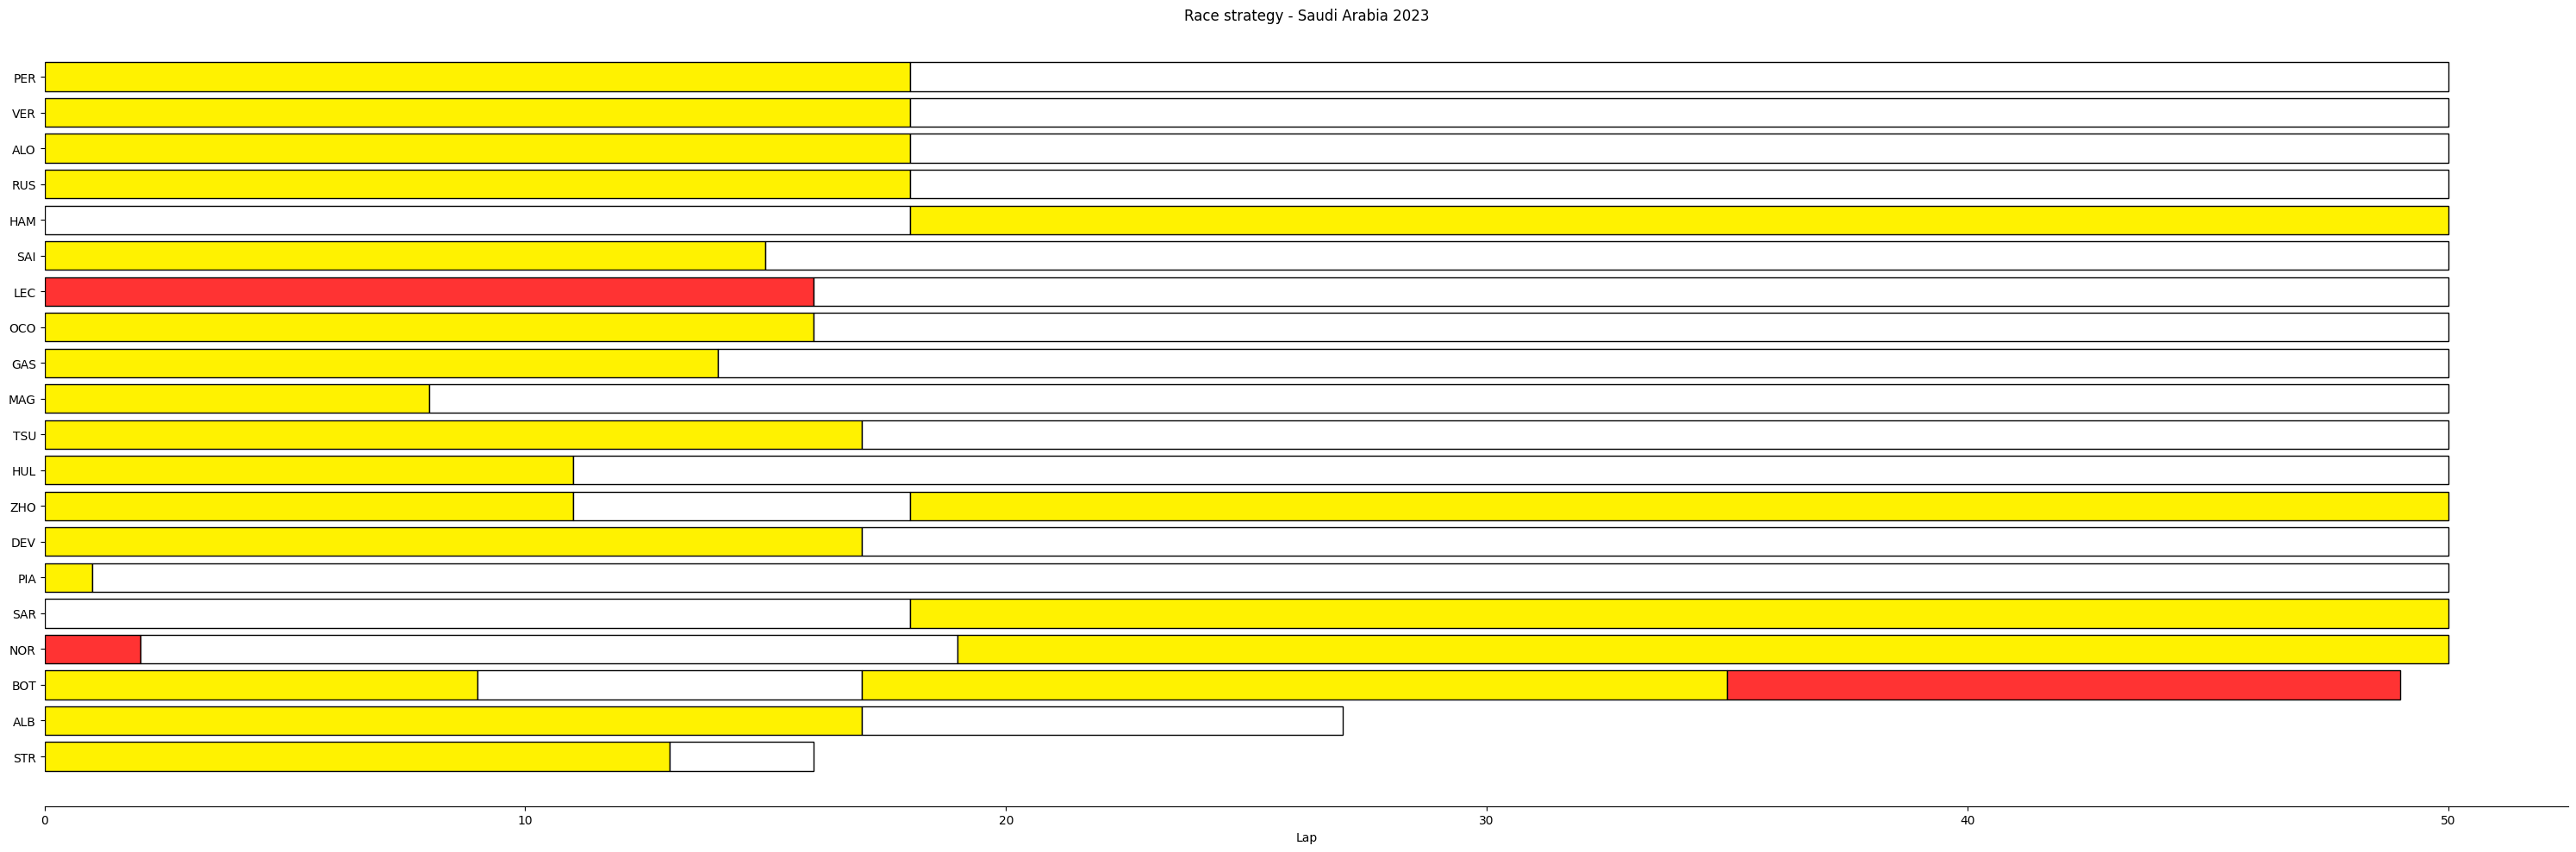

In [21]:
plt.rcParams["figure.figsize"] = [30, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

for driver in session_race.results['Abbreviation']:
    stints = driver_stints.loc[driver_stints['Driver'] == driver]
    
    previous_stint_end = 0
    for _, stint in stints.iterrows():
        plt.barh(
            [driver], 
            stint['StintLength'], 
            left=previous_stint_end, 
            color=compound_colors[stint['Compound']], 
            edgecolor = "black"
        )
        
        previous_stint_end = previous_stint_end + stint['StintLength']
        
plt.title(f'Race strategy - {gp} {year}')
        
plt.xlabel('Lap')

plt.gca().invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()